# Predicting Air Delays 
----

Thank you for your review of my code notebook.
This notebook's goal is to obtain, modify, clean, and prepare the dataset for exposure on a Machine Learning algorithm.

---
#### Problem Statement: 
Both travelers and airlines find delays frustrating and costly. This project attempts to be able to predict the probability of a commercial flight delay for any flight in the United States. 

---

#### MVP:
My product will be a small lightweight application run on `streamlit` platform for proof-of-concept where a user can find the probability of their desired flight having a delay, how long the delay may be, and how much will the delay cost the user in _lost time_ at the destination 

---
# Intake, Cleaning, and EDA. 

The primary challenge in this notebook is managing a large dataset. 
The next challenge will be to conduct meaningful EDA across the whole dataset. 
The notebook is structured as follows. 
1. Imports and set up
2. The size and complexity issue. 
3. Cleaning steps. 
4. Feature engineering and selection. 
5. Save the final CSV and discuss next steps. 

---


## 1. Set-up
----
I will be making use of `os`, `glob`, and `Amadeus API` libraries for python. 

`os` and `glob` will be used in conjunction with command line commands from the notebook to join the large CSV tables together.

`amadeus` is used as a way to utilize the service's self-service APIs. The API requires a token /key to use. 
[**sign up here**](https://developers.amadeus.com)


In [1]:
# !pip install amadeus

In [2]:
import os 
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


 I have 68 CSV files. Each file represents 1 month of flight history from all U.S. Airports. As a result each CSV is approximatley 150mb in size. Loading a few of them into the workspace of the notebook will result in a loss of data due to data exceeding memory capacity on the local machine. 
 <br>
 <br>
The approach will be to manipulate each of the CSV's and join them directly in the command line. 

In [4]:
#change the directory from root to where all the files I will join will be
os.chdir('/Volumes/lacie/data_ingestion/capstone_hopper')

### Data Sources
---
This project attempts gathered delay data from the **Department of Transportation (DOT) Flight Delay reporting Database**. Sadly, there was no public API available to access this data from DOT or from Federal Aviation Administration.

Given there was no way to programatically acquire the desired amount of data, I proceeded to utilize the basic public data library tool and download a CSV for one monthly period at a time.  

This created a lot of _just **too big** files_ and hence our first unanticipated technical challenge with this project; what do I do? 

The plan: use the command line to join all the tables. 
After cleaning see how large the file is. 

To implement this plan, using `glob` methods and direct command line. 


---
References<br>
[Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FGJ)
<br>
[GLOB tutorial](https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/)

### Create new dataset from monthly data sources. 
---
Run the below code if you have access to the files, which are large, on your local machine.

In [3]:
#a list of all the files. a total of 6.958GB of unfiltered raw data. 
!ls

10_nov_20.csv 23_oct_19.csv 36_sep_18.csv 49_aug_17.csv 61_aug_16.csv
11_oct_20.csv 24_sep_19.csv 37_aug_18.csv 4_may_21.csv  62_jul_16.csv
12_sep_20.csv 25_aug_19.csv 38_jul_18.csv 50_jul_17.csv 63_jun_16.csv
13_aug_20.csv 26_jul_19.csv 39_jun_18.csv 51_jun_17.csv 64_may_16.csv
14_jul_20.csv 27_jun_19.csv 3_jun_21.csv  52_may_17.csv 65_apr_16.csv
15_jun_20.csv 28_may_19.csv 40_may_18.csv 53_apr_17.csv 66_mar_16.csv
16_may_20.csv 29_apr_19.csv 41_apr_18.csv 54_mar_17.csv 67_feb_16.csv
17_apr_20.csv 2_jul_21.csv  42_mar_18.csv 55_feb_17.csv 68_jan_16.csv
18_mar_20.csv 30_mar_19.csv 43_feb_18.csv 56_jan_17.csv 6_mar_21.csv
19_feb_20.csv 31_feb_19.csv 44_jan_18.csv 57_dec_16.csv 7_feb_21.csv
1_aug_21.csv  32_jan_19.csv 45_dec_17.csv 58_nov_16.csv 8_jan_21.csv
20_jan_20.csv 33_dec_18.csv 46_nov_17.csv 59_oct_16.csv 9_dec_20.csv
21_dec_19.csv 34_nov_18.csv 47_oct_17.csv 5_apr_21.csv
22_nov_19.csv 35_oct_18.csv 48_sep_17.csv 60_sep_16.csv


In [4]:
#using glob, to locate all file names. 
file_ext = '.csv'
files = sorted([file for file in glob.glob(f'*{file_ext}')])

In [5]:
#the first five in the list to confirm 
print('first five files :',files[0:5],
      'last 5 files: ' ,files[-4:])

first five files : ['10_nov_20.csv', '11_oct_20.csv', '12_sep_20.csv', '13_aug_20.csv', '14_jul_20.csv'] last 5 files:  ['6_mar_21.csv', '7_feb_21.csv', '8_jan_21.csv', '9_dec_20.csv']


In [6]:
#using the pd.concat() i will read from a list comprehension to concat each and every csv. 
all_flights = pd.concat([pd.read_csv(file) for file in files ])


/var/folders/fy/0gjwghjd3qxdc86mx10x01rr0000gp/T/ipykernel_1744/3199323081.py:2: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  all_flights = pd.concat([pd.read_csv(file) for file in files ])


In [7]:
#export to csv
all_flights.to_csv( "all_flights.csv", index=False, encoding='utf-8-sig')

### Load existing dataset and then random subset the main data. 
---
Run this code from the repo to rebuild the whole data sent. 

In [4]:
all_flights = pd.read_csv('/Volumes/lacie/data_ingestion/capstone_hopper/all_flights.csv')

/Users/nickvanbergen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
all_flights.shape

(34409230, 34)

The process is completed with 34,409,230 flights with 34 _raw_ feature columns. It took approximately 8 minutes to process the file. 

In [6]:
all_flights.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,DIVERTED,CRS_ELAPSED_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 33
0,2020,11,12,4,2020-11-12,AA,N844NN,1783,PHL,"Philadelphia, PA",...,0.0,235.0,1.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,11,13,5,2020-11-13,AA,N339PL,1783,PHL,"Philadelphia, PA",...,0.0,235.0,1.0,1303.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Subsetting
---
Having already run the subset of the main data, please load or read the data from the last cell in this section.

In [126]:
#sample = all_flights.sample(frac = 0.25)

In [127]:
#lower case the columns headings. 
sample.columns = sample.columns.str.lower()

In [128]:
print(f"Number of sampled flights, {sample.shape[0] :,}")

Number of sampled flights, 8,602,308


In [133]:
# save this to CSV for further processing. 
#sample.to_csv('sample.csv', index = False)

In [362]:
sample = pd.read_csv('sample.csv')

<br>

-----

<br>

## EDA on the time columns. 
`year`, `month`, `day_of_month`, `day_of_week`
these will be analyze against the `arr_delay` values. 

---

`arr_delay` reveals the number of minutes difference between the scheduled arrival and actual arrival values.

A delay for our purposes is going to be any flight resulting in a 15 minute arrival delay. As a baseline. 


In [363]:
#assign the dataframe mask to the variable
delayed = sample[sample['arr_delay']>=15].copy()

### Year

     arr_delay                         
          size   min     max       mean
year                                   
2016    240788  15.0  2142.0  61.893803
2017    257159  15.0  1944.0  64.074335
2018    338077  15.0  2475.0  64.739648
2019    347946  15.0  1909.0  69.005349
2020    107981  15.0  3069.0  62.178624
2021    158840  15.0  2715.0  67.644265


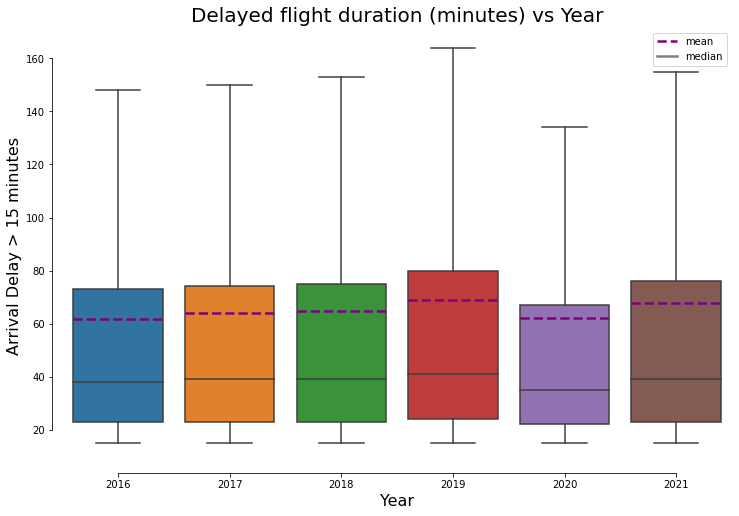

In [364]:
group1= delayed.groupby(['year']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group1)
plt.figure(figsize=(12,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
plt.title('Delayed flight duration (minutes) vs Year', size = 20)
year = sns.boxplot(x="year", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True,
            meanprops = meanlineprops)

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='purple', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Year', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()
plt.savefig("../Assets/delays_year_box.pdf", bbox_inches="tight")

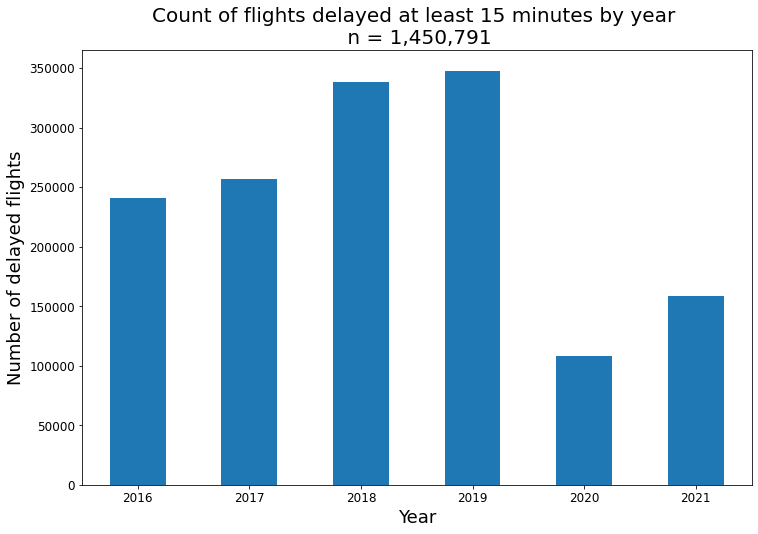

In [366]:
delayed['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,8));
plt.title(f'Count of flights delayed at least 15 minutes by year \n n = {sample[sample["arr_delay"]>=15]["year"].count() :,}', size = 20);
plt.xlabel('Year', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Number of delayed flights', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_year_bar_15_min.pdf", bbox_inches="tight")

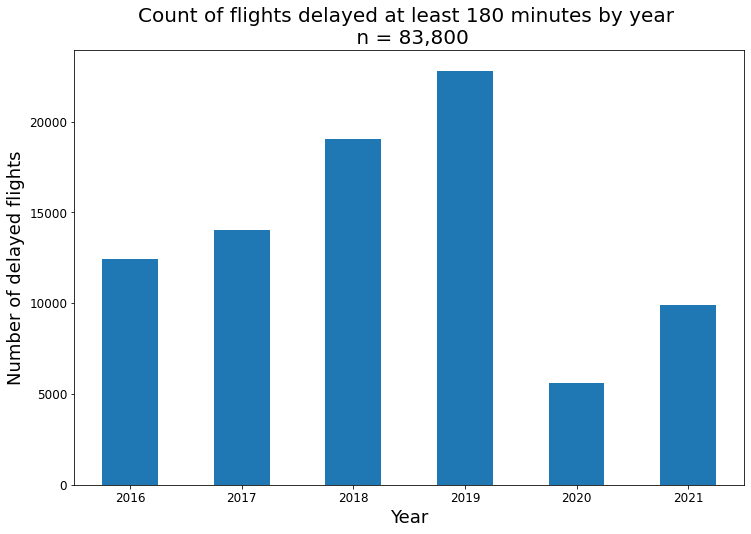

In [367]:
sample[sample["arr_delay"]>=180]['year'].value_counts().sort_index().plot(kind = 'bar', figsize = (12,8));
plt.title(f'Count of flights delayed at least 180 minutes by year \n n = {sample[sample["arr_delay"]>=180]["year"].count() :,}', size = 20);
plt.xlabel('Year', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Number of delayed flights', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_year_bar_180_min.pdf", bbox_inches="tight")

#### Discussion: Yearly data
----
It looks as though there were around the same average amount of delay, despite outliers.
Would this average change if we were to define delay _buckets_ ? 
* 15 - 30 minutes, minor delays, may impact tight connections.
* 31 - 60 minutes, normal delay, very likely to impact connecting flights or end of flight operations (like parking at an available gate)
* 61 - 120 minutes, long delay. Depending on cause and airline, passenger may be able to make free arrangements to get back on track.
* 120 - 240 minutes very long delay. Significant downline impacts. Lost time at destination, missed connections, depending on routing may also mean overnight stay at some connection point. 
* 241+ minutes. Extreme delay. 

### Month

In [368]:
sample['month'].unique()

array([10, 12,  6,  1,  7,  4,  3,  9,  2,  5, 11,  8])

In [369]:
months = {1 : '1-Jan', 2: '2-Feb', 3 : '3-Mar',
         4: '4-Apr', 5: '5-May', 6: '6-Jun',
         7: '7-Jul', 8:'8-Aug', 9 : '9-Sep',
         10 : '10-Oct', 11:'11-Nov', 12: '12-Dec'}

In [370]:
sample['month'] = sample['month'].apply(lambda x: months[x])
sample['month'].unique()

array(['10-Oct', '12-Dec', '6-Jun', '1-Jan', '7-Jul', '4-Apr', '3-Mar',
       '9-Sep', '2-Feb', '5-May', '11-Nov', '8-Aug'], dtype=object)

In [371]:
round(sample['month'].value_counts(normalize = True), 3)

3-Mar     0.096
8-Aug     0.095
7-Jul     0.095
1-Jan     0.088
6-Jun     0.088
4-Apr     0.084
5-May     0.084
2-Feb     0.081
10-Oct    0.074
12-Dec    0.073
11-Nov    0.071
9-Sep     0.071
Name: month, dtype: float64

In [374]:
group2= delayed.groupby(['month']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group2)
plt.figure(figsize=(10,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
plt.title('Delayed flight duration (minutes) by month \n all years 2016 - 2021', size = 20)
year = sns.boxplot(x="month", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True,
            meanprops = meanlineprops, order = ['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May',
                                                '6-Jun', '7-Jul', '8-Aug','9-Sep', '10-Oct', '11-Nov', '12-Dec'])

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='purple', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Month', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()
plt.savefig("../Assets/delays_month_box.pdf", bbox_inches="tight")

      arr_delay                         
           size   min     max       mean
month                                   
1        122357  15.0  2536.0  64.366697
2        119153  15.0  2794.0  65.639111
3        118930  15.0  1948.0  60.250929
4        106575  15.0  2322.0  66.132648
5        122266  15.0  2715.0  65.353909
6        160009  15.0  2106.0  68.350237
7        168495  15.0  2563.0  70.972248
8        160420  15.0  2677.0  68.382303
9         80558  15.0  1810.0  62.142854
10        92367  15.0  2153.0  59.998787
11        83241  15.0  2402.0  60.266263
12       116420  15.0  3069.0  63.611682


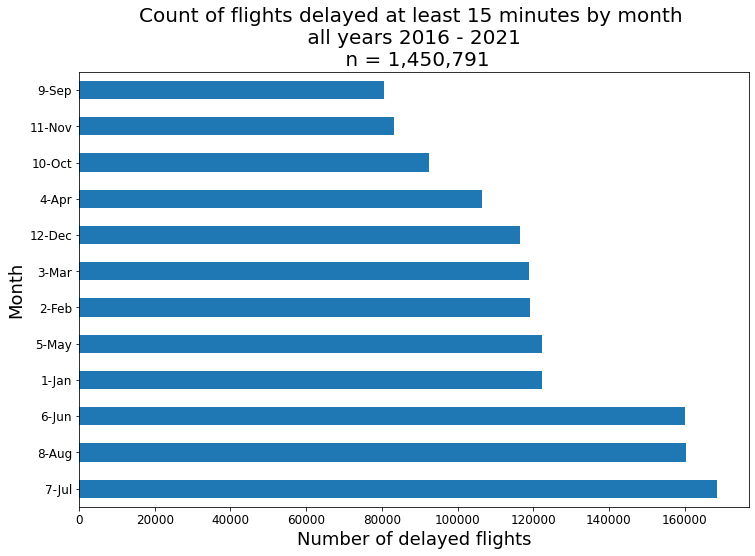

In [375]:
#counts of any delayed flight
round(sample[sample['arr_delay']>=15]['month'].value_counts()).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Count of flights delayed at least 15 minutes by month \n all years 2016 - 2021 \n n = {sample[sample["arr_delay"]>=15]["month"].count() :,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Month', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_month_bar_15_min.pdf", bbox_inches="tight")

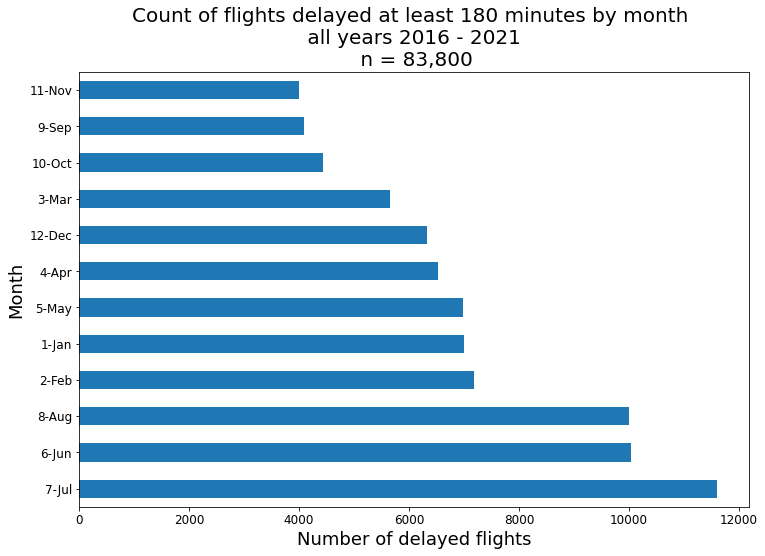

In [376]:
#counts of any delayed flight
round(sample[sample['arr_delay']>=180]['month'].value_counts()).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Count of flights delayed at least 180 minutes by month \n all years 2016 - 2021 \n n = {sample[sample["arr_delay"]>=180]["month"].count() :,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Month', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_month_bar_180_min.pdf", bbox_inches="tight")

#### Discussion: Summer months.
----
Traditionally, the summer travel season is the busiest season for airlines to operate flights. 
This means, for business and leisure customer segments there is a higher persistent historical chance of delay due to the increase in flights that are in the air system. 

### Day of the week. 
The day of the week is represented by a number begining on Monday with 1 and ending the week with 7. The data dictionary states that there is an unknown value of 9. 

depending on how wide you want your research to go, let's ensure that there are no unknown days by masking and updating our `sample` variable with the resulting dataframe. 

In [377]:
sample = sample[sample['day_of_week'] != 9].copy()

Next, I will want to take basic counts and measure delays as we did earlier with `year` and `month`. 
<br> 
Like the `month` variable, the data came over encoded with integers as mentioned above. 

In [378]:
days = { 1: 'Mon', 2: 'Tue', 3:'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

In [379]:
sample['day_of_week'] = sample['day_of_week'].apply(lambda x: days[x])
sample['day_of_week'].unique()

array(['Sun', 'Fri', 'Mon', 'Sat', 'Wed', 'Thu', 'Tue'], dtype=object)

In [380]:
group3= delayed.groupby(['day_of_week']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group3)
plt.figure(figsize=(12,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
plt.title('Delayed flight duration (minutes) by day of the week \n all years 2016 - 2021' , size = 20)
year = sns.boxplot(x="day_of_week", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True,
            meanprops = meanlineprops, order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri',
                                                'Sat', 'Sun'])

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='purple', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Day of Week', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()
plt.savefig("../Assets/delays_daily_box.pdf", bbox_inches="tight")

            arr_delay                         
                 size   min     max       mean
day_of_week                                   
1              224259  15.0  2402.0  67.294954
2              191834  15.0  2715.0  64.821043
3              196547  15.0  2794.0  63.632607
4              234193  15.0  3069.0  64.636309
5              238600  15.0  2563.0  64.883395
6              159288  15.0  2229.0  65.403897
7              206070  15.0  2677.0  66.320381


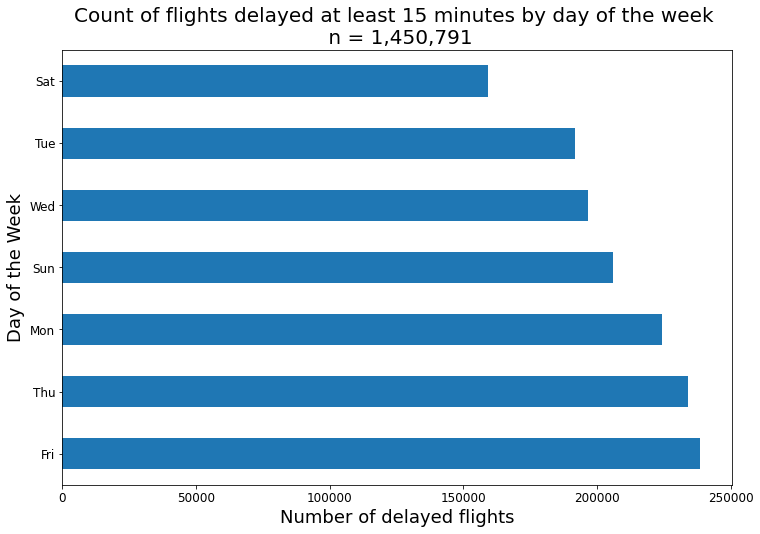

In [381]:
#counts of any delayed flight
round(sample[sample['arr_delay']>=15]['day_of_week'].value_counts()).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Count of flights delayed at least 15 minutes by day of the week \n n = {sample[sample["arr_delay"]>=15].shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Day of the Week', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_daily_bar_15_min.pdf", bbox_inches="tight")

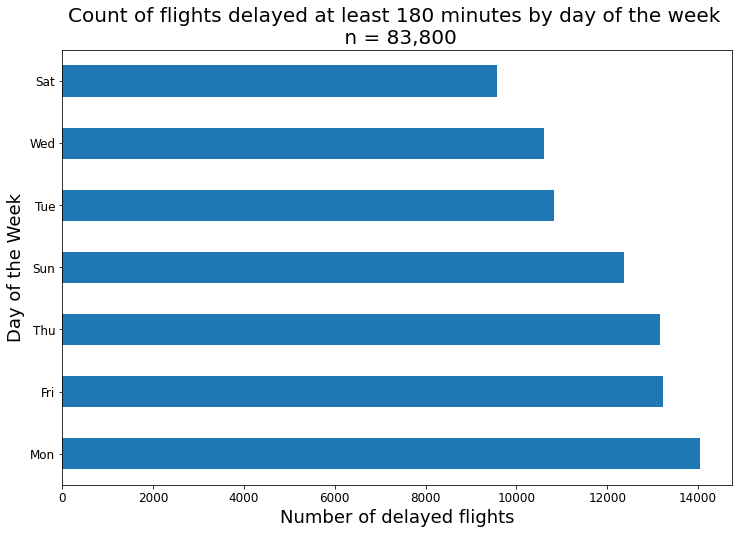

In [382]:
#counts of any delayed flight
round(sample[sample['arr_delay']>=180]['day_of_week'].value_counts()).plot(kind = 'barh', figsize=(12,8))
plt.title(f'Count of flights delayed at least 180 minutes by day of the week \n n = {sample[sample["arr_delay"]>=180].shape[0]:,}', size = 20);
plt.xlabel('Number of delayed flights', size = 18 )
plt.xticks(fontsize = 12, rotation = 0)
plt.ylabel('Day of the Week', size = 18 )
plt.yticks(fontsize = 12);
plt.savefig("../Assets/delays_daily_bar_180_min.pdf", bbox_inches="tight")

#### Discussion
There doesn't appear to be a day-to-day difference in the mean delay in the sample data. 
There is an apparent advantage to flying on Saturday, but let's consider the scale of the chart and the actual difference between the highest mean delay on a Saturday vs on a Friday. 

----

## EDA on airline and airports on arrival delay (`arr_delay`):
We can review other columns that are specific to company (the airline) and to location (the origin and destination airports) and to the duration of the flight (distance).

### Airline specific performance. 
----
Distilling the dataset to its component airlines have already been done for us but the DOT. 
<br>
However we need to get some definitions out of the way here to help us make sense of what we are looking at. 

#### Dealing with subsidiary airlines and codeshare flights. 
---
Since the dawn of deregulation, airlines have been free to form marketing partnerships often advertising another airline's flight and then taking a share of the revenue from the ticket sale. 
<br><br>
For this project, we are only analyzing an operating carrier. That is, an operating carrier is the airline that flies the plane, not the airline (or entity) that sold the ticket. 
<br> <br>
The data comes from BTS in by listing the operating carrier only. This is ideal since each operating carrier has their own personnel that are responsible for the marketing and operation of a particular flight. In other words, we can measure a delay and attribute exact delay times (as required by DOT) on the reason for the delay. 
<br> <br>
Even subsidiary airlines are listed independently of the parent airline since the parent and subsidiary do not share operational control of that particular flight. 
<br><br>
There are more than a few airlines on our dataset that are wholly-owned subsidiary airlines that have their own operational certificate from their aviation governing body. These are indeed separate airlines, however, it is not readily apparent to the average leisure customer. 

First job in this EDA series is to decode the airline designators (two letter designations EG AA = American Airlines, WN = Southwest Airlines) and convert the category column to their commonly know name. 


In [383]:
airlines = {}
for airline in sample['op_unique_carrier'].unique():
    airlines[airline] = 0

In [384]:
airlines

{'UA': 0,
 '9E': 0,
 'MQ': 0,
 'OO': 0,
 'F9': 0,
 'DL': 0,
 'AA': 0,
 'OH': 0,
 'G4': 0,
 'YV': 0,
 'WN': 0,
 'YX': 0,
 'AS': 0,
 'EV': 0,
 'B6': 0,
 'NK': 0,
 'HA': 0,
 'VX': 0,
 'QX': 0}

In [385]:
airlines['UA'] ='United Airlines'
airlines['9E'] ='Endeavor Air'
airlines['MQ'] ='Envoy Air'
airlines['OO'] ='Skywest Airlines'
airlines['F9'] ='Frontier Airlines'
airlines['DL'] ='Delta Airlines'
airlines['AA'] ='American Airlines'


In [386]:
airlines['OH'] ='PSA Airlines'
airlines['G4'] ='Allegiant Air'
airlines['YV'] ='Mesa Air'
airlines['WN'] ='Southwest Airlines'
airlines['YX'] ='Republic Airways'
airlines['AS'] ='Alaska Airlines'
airlines['EV'] ='ExpressJet'

In [387]:
airlines['B6'] ='JetBlue'
airlines['NK'] ='Spirit Airlines'
airlines['HA'] ='Hawaiian Airlines'
airlines['VX'] ='Virgin America'
airlines['QX'] ='Horizon Air'


In [388]:
airlines

{'UA': 'United Airlines',
 '9E': 'Endeavor Air',
 'MQ': 'Envoy Air',
 'OO': 'Skywest Airlines',
 'F9': 'Frontier Airlines',
 'DL': 'Delta Airlines',
 'AA': 'American Airlines',
 'OH': 'PSA Airlines',
 'G4': 'Allegiant Air',
 'YV': 'Mesa Air',
 'WN': 'Southwest Airlines',
 'YX': 'Republic Airways',
 'AS': 'Alaska Airlines',
 'EV': 'ExpressJet',
 'B6': 'JetBlue',
 'NK': 'Spirit Airlines',
 'HA': 'Hawaiian Airlines',
 'VX': 'Virgin America',
 'QX': 'Horizon Air'}

In [389]:
sample['op_unique_carrier'] = sample['op_unique_carrier'].apply(lambda x: airlines[x])

In [390]:
#rename the column _op_unique_carrier_ to _airline_
sample = sample.rename({'op_unique_carrier': 'airline'}, axis=1)  # new method

In [391]:
#update delayed varialbe
delayed = sample[sample['arr_delay']>=15].copy()

In [392]:
delayed.airline.value_counts()

Southwest Airlines    295052
American Airlines     213297
Skywest Airlines      163620
Delta Airlines        154261
United Airlines       129486
JetBlue                87109
ExpressJet             57797
Envoy Air              44337
Spirit Airlines        43345
Alaska Airlines        43306
Republic Airways       41838
PSA Airlines           39388
Frontier Airlines      34979
Mesa Air               31749
Endeavor Air           29741
Allegiant Air          19578
Hawaiian Airlines       9901
Virgin America          9645
Horizon Air             2362
Name: airline, dtype: int64

#### Dealing with airlines that no longer operate. 
---
There are 19 airlines and not all of them were in business during the sample period available. 
One such example is Virgin America ('VX'). 

VX was acquired by Alaska Airlines in 2017 and stoped operating under it's callsign in 2018. 
During the merger, many departments and personnel were moved from San Francisco to Seattle where Alaska Airlines is headquartered. 

For the purpose of this analysis, airlines not in operation in 2021 were removed from the airline performance analysis. 

In [393]:
[airline for airline in sample['airline'].unique() if airline not in delayed[delayed['year']==2021]['airline'].unique()]

['ExpressJet', 'Virgin America']

In [394]:
print(sample[sample['airline']== 'ExpressJet']['year'].value_counts().sum()/sample.shape[0])

0.03539887202364761


In [395]:
print(sample[sample['airline']== 'Virgin America']['year'].value_counts().sum()/sample.shape[0])

0.00457714371538429


In [396]:
sample = sample[sample['airline'] != 'ExpressJet'].copy()

In [397]:
#update sample dataframe
sample = sample[sample['airline'] != 'Virgin America'].copy()

In [398]:
#update delayed mask 
delayed = sample[sample['arr_delay']>=15].copy()

In [399]:
#save copy of cleaned sample dataframe
sample.to_csv('sample_cleaned.csv', index = False)

                   arr_delay                         
                        size   min     max       mean
airline                                              
Alaska Airlines        43306  15.0   892.0  49.009214
Allegiant Air          19578  15.0  1961.0  72.147768
American Airlines     213297  15.0  3069.0  64.246061
Delta Airlines        154261  15.0  1240.0  67.548836
Endeavor Air           29741  15.0  1937.0  76.692008
Envoy Air              44337  15.0  1628.0  61.338543
Frontier Airlines      34979  15.0  1253.0  68.896938
Hawaiian Airlines       9901  15.0  2475.0  42.507625
Horizon Air             2362  15.0   528.0  46.148603
JetBlue                87109  15.0  1624.0  71.496286
Mesa Air               31749  15.0  1601.0  77.817727
PSA Airlines           39388  15.0  1842.0  67.693003
Republic Airways       41838  15.0  1381.0  66.996964
Skywest Airlines      163620  15.0  1909.0  78.977112
Southwest Airlines    295052  15.0   760.0  50.339760
Spirit Airlines        43345

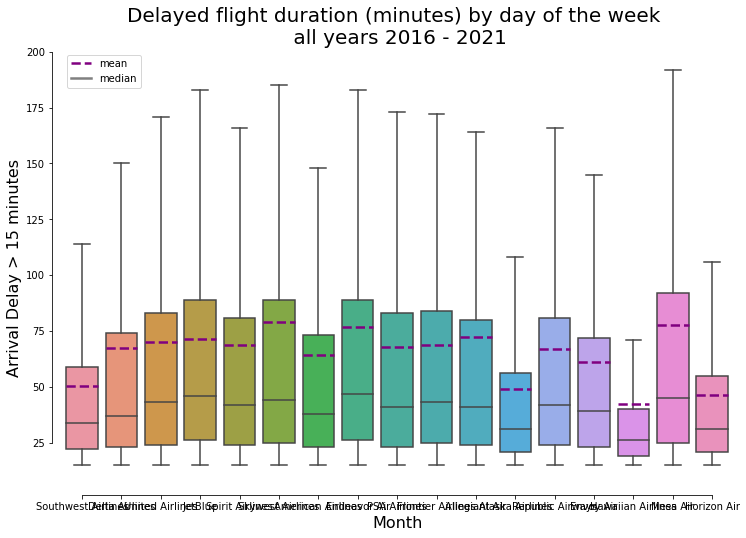

In [400]:
group4= delayed.groupby(['airline']).agg({'arr_delay' : ['size', 'min', 'max', 'mean'] })
print(group4)
plt.figure(figsize=(12,8));
plt.meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')
plt.title('Delayed flight duration (minutes) by day of the week \n all years 2016 - 2021' , size = 20)
year = sns.boxplot(x="airline", y="arr_delay",
            data=delayed, showfliers = False,
            showmeans = True, meanline= True,
            meanprops = meanlineprops)

sns.despine(offset=10, trim=True)
plt.plot([], [], '--', linewidth=2.5, color='purple', label='mean')
plt.plot([], [], '-', linewidth=2.5, color='gray', label='median')
plt.xlabel('Month', size = 16)
plt.ylabel('Arrival Delay > 15 minutes', size = 16)

plt.legend()

In [301]:
#get a list of all airlines in the data. 
len(sample['op_unique_carrier'].unique()) 

19

In [298]:
sample[sample['op_unique_carrier'] == 'VX']['year'].value_counts()

2017    17801
2016    17188
2018     4385
Name: year, dtype: int64

In [ ]:
#rename airline column and decode airline call sign to legal entity name. 
airlines = { 1: 'Mon', 2: 'Tue', 3:'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

In [ ]:
## final step is to create new column for delay buckets. 
